In [1]:
# from icecream import ic

import numpy as np
import pandas as pd
from scipy.linalg import block_diag
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import pprint

import plotly.graph_objects as go
import plotly.express as px
import time

In [2]:
from stareg import Stareg

MEEEE and Moooooo and asdasdasd


### Create some 1D test data

In [3]:
np.random.seed(2)

n_data = 1000
x = np.random.rand(n_data)
xpred = np.linspace(0,1,n_data)
ytrue = np.sin(6*x) + 4*x**2
ytest = np.sin(6*xpred) + 5*xpred**2
y = ytrue + np.random.normal(scale=0.1, size=n_data)

df = pd.DataFrame(data=dict(x=x, y=y, ytrue=ytrue))
df_train, df_test = train_test_split(df)

Xtrain = df_train[["x"]].values.reshape((-1,1))
ytrain = df_train[["y"]].values.ravel()

In [4]:
description = ( ("s(1)", 100, "inc", 10000, "e"), )

### Create the test model

In [5]:
star_model = Stareg()

Class initialization


In [6]:
res = star_model.fit(description, Xtrain, ytrain)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 213.63it/s]


===================Iteration 1====================
            MSE: 0.014791352713029343             
===================Iteration 2====================
            MSE: 0.015740738014684136             
---------------Iteration Finished!----------------


In [7]:
ypred = star_model.predict(xpred.reshape(-1,1), res["model"], res["coef_"])

Process  s(1)


In [8]:
mean_squared_error(ypred, ytest)

0.19343904328564465

### Create some 2d test data

In [40]:
np.random.seed(2)

n_data = 1000
x1 = np.random.rand(n_data)
x2 = np.random.rand(n_data)

ytrue = np.sin(6*x1) + 4*x2**2
y = ytrue + np.random.normal(scale=0.1, size=n_data)


df = pd.DataFrame(data=dict(x1=x1, x2=x2, y=y, ytrue=ytrue))
df_train, df_test = train_test_split(df)

Xtrain = df_train[["x1", "x2"]].values
ytrain = df_train[["y"]].values.ravel()

### Test 2d spline model

description = ( ("s(1)", 100, "none", 6000, "e"),
                ("s(2)", 100, "inc", 6000, "e"),
                ("t(1,2)", (12,10), ("none","none"), (0,0), ("e", "e"))
                )

# Create test model

M2d = Stareg()

res2d = M2d.fit(description, Xtrain, ytrain)

 23%|█████████████████████████████████████▍                                                                                                                             | 23/100 [00:00<00:00, 223.25it/s]

Class initialization


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 142.01it/s]


===================Iteration 1====================
            MSE: 0.009424898850510302             
---------------Iteration Finished!----------------


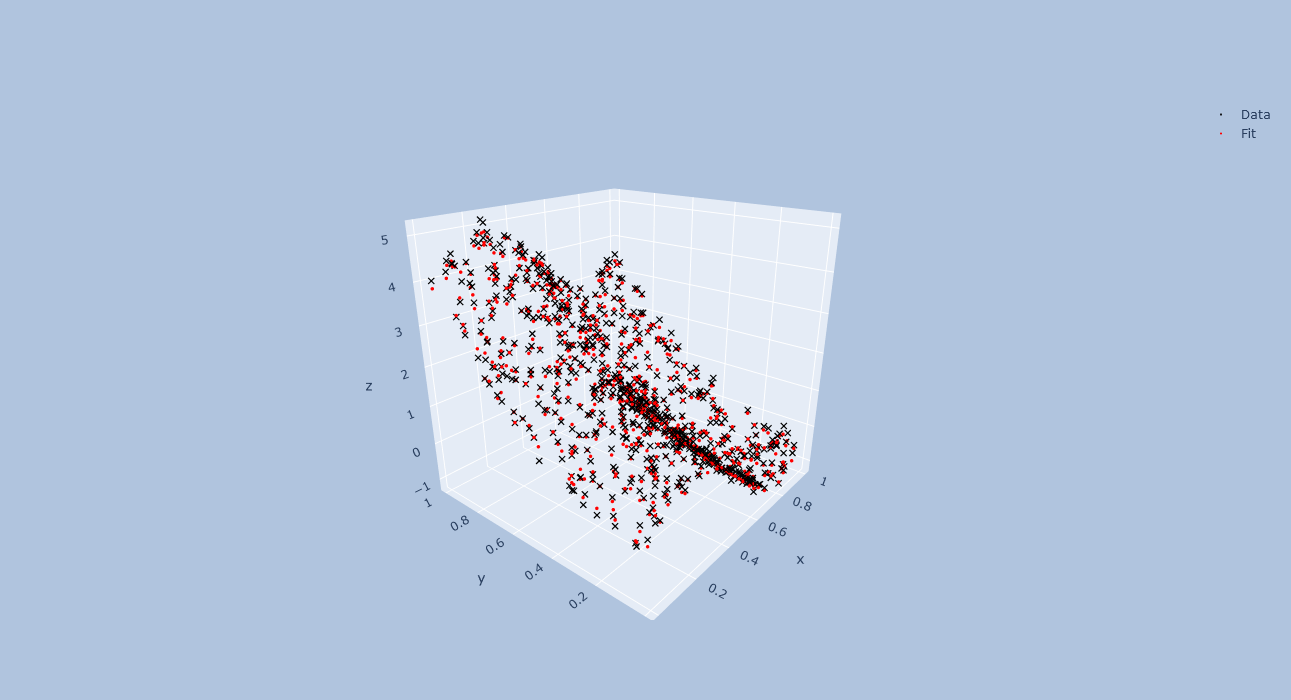

In [35]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df_train["x1"], y=df_train["x2"], z=df_train["y"], name="Data", mode="markers", marker=dict(size=2, color="black", symbol="x")))
fig.add_trace(go.Scatter3d(x=df_train["x1"], y=df_train["x2"], z=res2d["B"]@res2d["coef"], name="Fit", mode="markers", marker=dict(size=2, color="red", symbol="circle")))

fig.update_layout(
    autosize=False,
    width=700,
    height=700,
    paper_bgcolor="LightSteelBlue",
)

### Test 2d spline model with tensorporduct spliens

In [36]:
np.random.seed(2)

n_data = 1000
x1 = np.random.rand(n_data)
x2 = np.random.rand(n_data)

ytrue = np.sin(6*x1) + 4*x2**2 - x1*x2
y = ytrue + np.random.normal(scale=0.1, size=n_data)


df = pd.DataFrame(data=dict(x1=x1, x2=x2, y=y, ytrue=ytrue))
df_train, df_test = train_test_split(df)

Xtrain = df_train[["x1", "x2"]].values
ytrain = df_train[["y"]].values.ravel()

In [37]:
description = ( ("s(1)", 100, "none", 6000, "e"),
                ("s(2)", 100, "inc", 6000, "e"),
                ("t(1,2)", (12,8), ("none", "inc"), (0,6000), ("e","e")),
              )

In [38]:
M2d_with_tps = stareg()

res2d_with_tps = M2d_with_tps.fit(description, Xtrain, ytrain)

 21%|██████████████████████████████████▏                                                                                                                                | 21/100 [00:00<00:00, 205.84it/s]

Class initialization


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 217.82it/s]
ic| basis_matrix.shape: (750, 296)
ic| smoothness_matrix.shape: (296, 296)
ic| Dc1.shape: (96, 96)
ic| Dc2.shape: (84, 96)
ic| weights1.shape: (96, 96)
ic| weights2.shape: (84, 84)
ic| constraint_matrix.shape: (296, 296)
ic| Dc1.shape: (96, 96)
ic| Dc2.shape: (84, 96)
ic| weights1.shape: (96, 96)
ic| weights2.shape: (84, 84)
ic| constraint_matrix.shape: (296, 296)


===================Iteration 1====================
            MSE: 0.009378722081397551             


ic| Dc1.shape: (96, 96)
ic| Dc2.shape: (84, 96)
ic| weights1.shape: (96, 96)
ic| weights2.shape: (84, 84)
ic| constraint_matrix.shape: (296, 296)


===================Iteration 2====================
             MSE: 0.00942945420247474             


ic| Dc1.shape: (96, 96)
ic| Dc2.shape: (84, 96)
ic| weights1.shape: (96, 96)
ic| weights2.shape: (84, 84)
ic| constraint_matrix.shape: (296, 296)


===================Iteration 3====================
            MSE: 0.009449430402925875             


ic| Dc1.shape: (96, 96)
ic| Dc2.shape: (84, 96)
ic| weights1.shape: (96, 96)
ic| weights2.shape: (84, 84)
ic| constraint_matrix.shape: (296, 296)


===================Iteration 4====================
            MSE: 0.009449459046889696             
---------------Iteration Finished!----------------


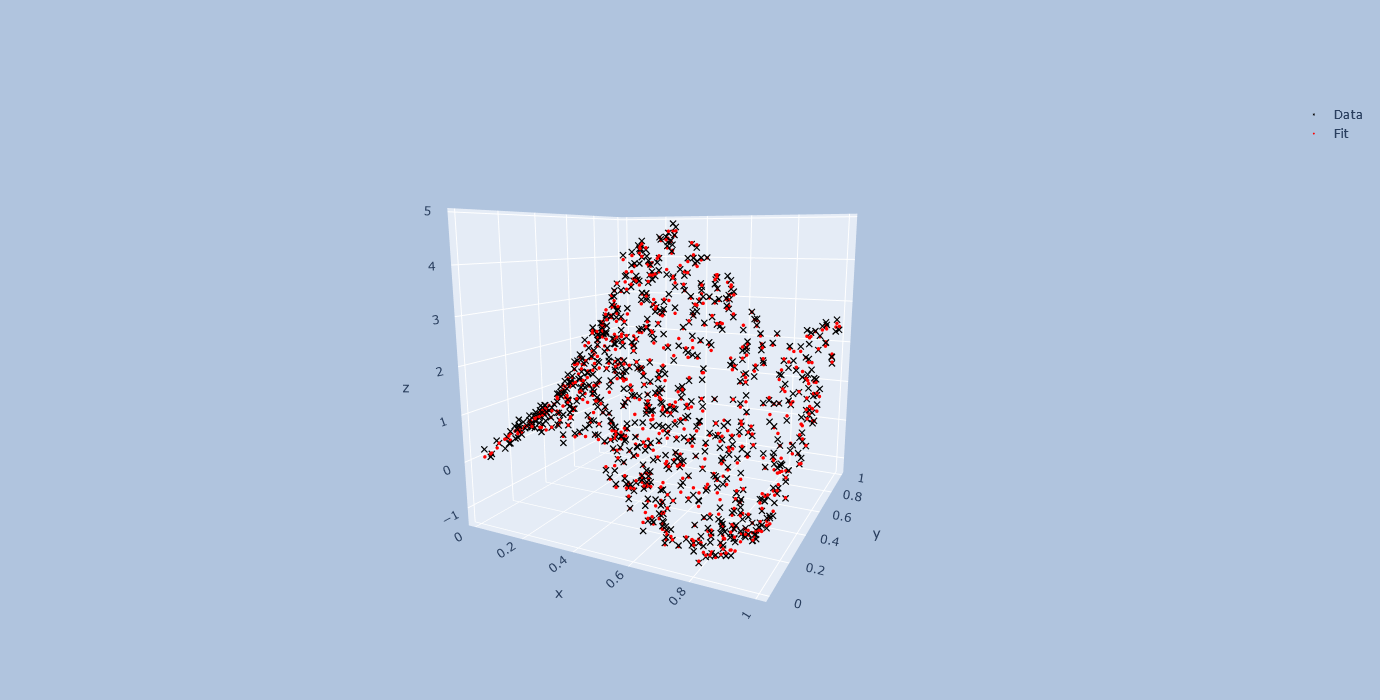

In [39]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df_train["x1"], y=df_train["x2"], z=df_train["y"], name="Data", mode="markers", marker=dict(size=2, color="black", symbol="x")))
fig.add_trace(go.Scatter3d(x=df_train["x1"], y=df_train["x2"], z=res2d_with_tps["B"]@res2d_with_tps["coef"], name="Fit", mode="markers", marker=dict(size=2, color="red", symbol="circle")))

fig.update_layout(
    autosize=False,
    width=700,
    height=700,
    paper_bgcolor="LightSteelBlue",
)

# **Bosch Data**

In [30]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import scipy.io
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from stareg import Bspline

In [31]:
np.random.seed(2)
data_path = Path("../../Master-Thesis/Data/2021_01_21_DatenEHS")
inputs = ["shd", "qpd"]
os.listdir(data_path)

['forceMapMeas_Multsin.mat',
 'forceMapMod_Multsin.mat',
 'forceMapSynth_Test.mat',
 'forceMapSynth_Train.mat',
 'forceMapSynth_Vali.mat',
 'readme.md']

In [32]:
def file_to_df(fname):
    mat = scipy.io.loadmat(data_path/fname)
    df = pd.DataFrame(data=dict(shd=mat["shd"].ravel(), qpd=mat["qpd"].ravel(), Imag=mat["Imag"].ravel(), Fmagd=mat["Fmagd"].ravel()))
    return df

## Load Data (Measurments) and perform min-max-scaling

In [33]:
#df = file_to_df("forceMapMeas_Multsin.mat")
df = file_to_df("forceMapSynth_Train.mat")
x = df[inputs].values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_df = pd.DataFrame(np.hstack((x_scaled, df["Imag"].values.reshape(-1,1))), columns=inputs+["Imag"])

## Train-Test Split

In [34]:
train_df, test_df = train_test_split(scaled_df)
Xtrain, ytrain = train_df[["shd", "qpd"]].values, train_df["Imag"].values
Xtest, ytest = test_df[["shd", "qpd"]].values, test_df["Imag"].values

Xtrain.shape, ytrain.shape, "\t", Xtest.shape, ytest.shape

((750, 2), (750,), '\t', (250, 2), (250,))

## Plot Data

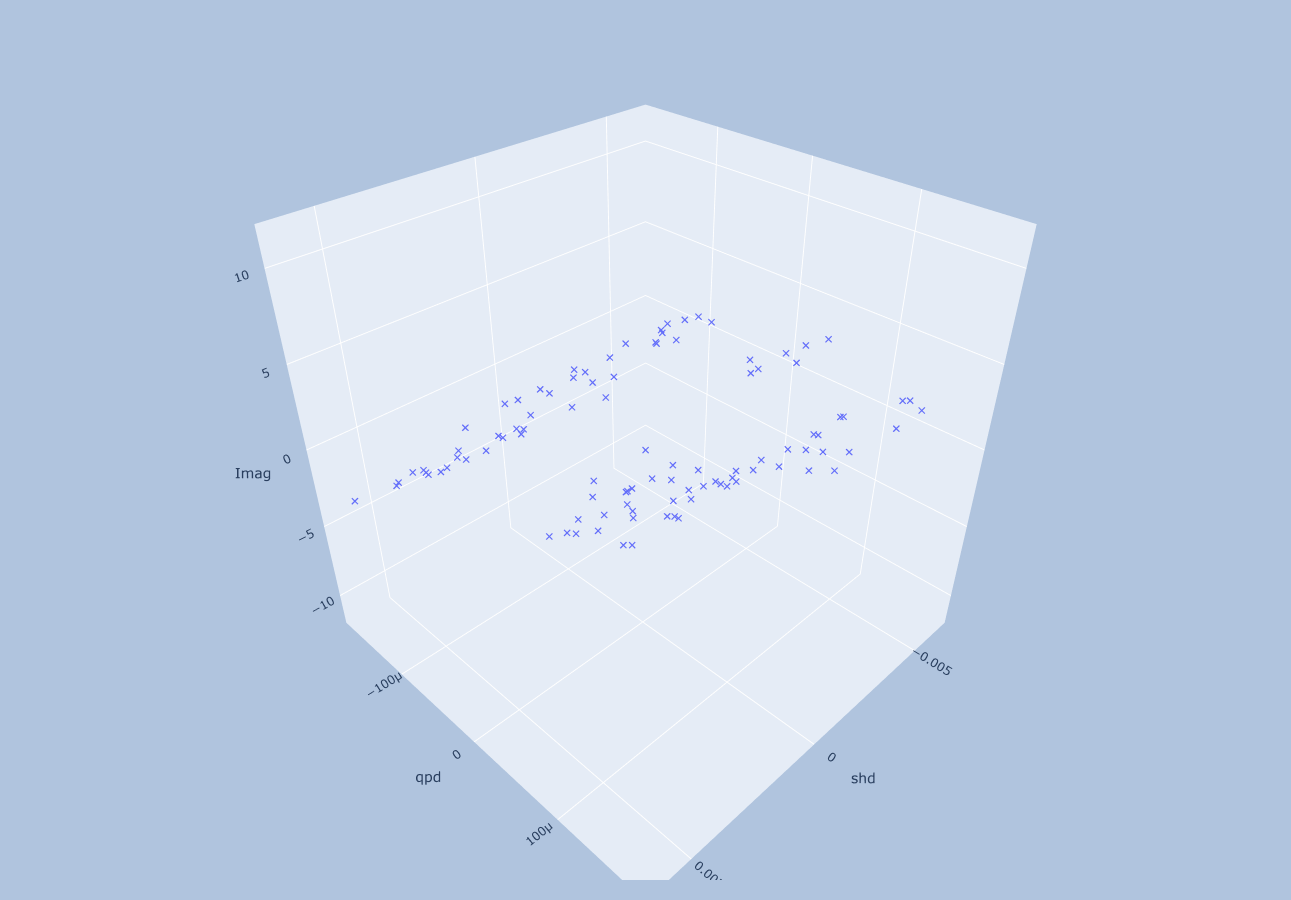

In [35]:
plot_i = 10
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df["shd"][::plot_i], y=df["qpd"][::plot_i], z=df["Fmagd"][::plot_i], name="Data", mode="markers", marker=dict(size=2, symbol="x")))

fig.update_layout(
    scene=dict(xaxis_title="shd", yaxis_title="qpd", zaxis_title="Imag"),
    autosize=False,
    width=1400,
    height=900,
    paper_bgcolor="LightSteelBlue",
    margin=dict(l=20, r=20, t=20, b=20),
)

## Generate the model descriptions

In [36]:
model_list =["s1s2_WC", "s1s2", "t12_WC", "t12", "tot_WC", "tot"]
m_s1s2_without_constrait =  (("s(1)", 100, "none", 0, "e"), 
                             ("s(2)", 100, "none", 0, "e"), )
m_s1s2 = (("s(1)", 100, "none", 1000, "e"), 
          ("s(2)", 100, "inc", 6000, "e"), )

m_t12_without_constraint = (("t(1,2)", (30,10), ("none", "none"), (0,0), ("e", "e")), )
m_t12 = (("t(1,2)", (30,10), ("inc", "inc"), (6000,6000), ("e", "e")), )

m_tot_without_constraint = ( #("s(1)", 100, "none", 0, "e"), 
                             ("s(2)", 100, "none", 0, "e"),
                             ("t(1,2)", (20,10), ("none", "none"), (0,0), ("e", "e")), )
m_tot = ( #("s(1)", 100, "none", 1000, "e"), 
          ("s(2)", 100, "inc", 1000, "e"),
          ("t(1,2)", (30,10), ("inc", "inc"), (6000,6000), ("e", "e")), )

## Fit the models

In [37]:
STAREG = stareg()

Class initialization


In [38]:
M1 = STAREG.fit(m_s1s2_without_constrait, Xtrain, ytrain)
M2 = STAREG.fit(m_s1s2, Xtrain, ytrain)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 223.05it/s]
ic| basis_matrix.shape: (750, 200)
ic| smoothness_matrix.shape: (200, 200)
ic| constraint_matrix.shape: (200, 200)
ic| constraint_matrix.shape: (200, 200)


===================Iteration 1====================
            MSE: 0.024239824639415354             


 24%|███████████████████████████████████████                                                                                                                            | 24/100 [00:00<00:00, 228.66it/s]

---------------Iteration Finished!----------------


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 215.88it/s]
ic| basis_matrix.shape: (750, 200)
ic| smoothness_matrix.shape: (200, 200)
ic| constraint_matrix.shape: (200, 200)
ic| constraint_matrix.shape: (200, 200)


===================Iteration 1====================
             MSE: 0.02453032400874694             


ic| constraint_matrix.shape: (200, 200)


===================Iteration 2====================
            MSE: 0.024277362408982286             


ic| constraint_matrix.shape: (200, 200)


===================Iteration 3====================
            MSE: 0.024239824639415354             
---------------Iteration Finished!----------------


In [39]:
M3 = STAREG.fit(m_t12_without_constraint, Xtrain, ytrain)
M4 = STAREG.fit(m_t12, Xtrain, ytrain)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.27it/s]
ic| basis_matrix.shape: (750, 300)
ic| smoothness_matrix.shape: (300, 300)
ic| Dc1.shape: (300, 300)
ic| Dc2.shape: (300, 300)
ic| weights1.shape: (300, 300)
ic| weights2.shape: (300, 300)
ic| constraint_matrix.shape: (300, 300)
ic| Dc1.shape: (300, 300)
ic| Dc2.shape: (300, 300)
ic| weights1.shape: (300, 300)
ic| weights2.shape: (300, 300)
ic| constraint_matrix.shape: (300, 300)


===================Iteration 1====================
            MSE: 0.0027381431025959736            


  3%|████▉                                                                                                                                                                | 3/100 [00:00<00:03, 27.29it/s]

---------------Iteration Finished!----------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.63it/s]
ic| basis_matrix.shape: (750, 300)
ic| smoothness_matrix.shape: (300, 300)
ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (300, 300)
ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (300, 300)


===================Iteration 1====================
            MSE: 0.004036727680680996             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (300, 300)


===================Iteration 2====================
            MSE: 0.004065535874381947             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (300, 300)


===================Iteration 3====================
            MSE: 0.004177743774896094             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (300, 300)


===================Iteration 4====================
             MSE: 0.00421876116032522             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (300, 300)


===================Iteration 5====================
            MSE: 0.004249092179922009             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (300, 300)


===================Iteration 6====================
            MSE: 0.004202477729615392             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (300, 300)


===================Iteration 7====================
            MSE: 0.004229098150054383             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (300, 300)


===================Iteration 8====================
            MSE: 0.004240038240306186             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (300, 300)


===================Iteration 9====================
            MSE: 0.004248541697845169             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (300, 300)


===================Iteration 10===================
            MSE: 0.004247440704934842             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (300, 300)


===================Iteration 11===================
            MSE: 0.004258172917088089             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (300, 300)


===================Iteration 12===================
             MSE: 0.00426423630115556             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (300, 300)


===================Iteration 13===================
            MSE: 0.004264767757380389             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (300, 300)


===================Iteration 14===================
            MSE: 0.004265057333825361             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (300, 300)


===================Iteration 15===================
            MSE: 0.004265052729614894             
Stop the count!
---------------Iteration Finished!----------------


In [40]:
M5 = STAREG.fit(m_tot_without_constraint, Xtrain, ytrain)
M6 = STAREG.fit(m_tot, Xtrain, ytrain)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.51it/s]
ic| basis_matrix.shape: (750, 300)
ic| smoothness_matrix.shape: (300, 300)
ic| Dc1.shape: (200, 200)
ic| Dc2.shape: (200, 200)
ic| weights1.shape: (200, 200)
ic| weights2.shape: (200, 200)
ic| constraint_matrix.shape: (300, 300)
ic| Dc1.shape: (200, 200)
ic| Dc2.shape: (200, 200)
ic| weights1.shape: (200, 200)
ic| weights2.shape: (200, 200)
ic| constraint_matrix.shape: (300, 300)


===================Iteration 1====================
            MSE: 0.003964983675931775             


 22%|███████████████████████████████████▊                                                                                                                               | 22/100 [00:00<00:00, 215.02it/s]

---------------Iteration Finished!----------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.46it/s]
ic| basis_matrix.shape: (750, 400)
ic| smoothness_matrix.shape: (400, 400)
ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (400, 400)
ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (400, 400)


===================Iteration 1====================
            MSE: 0.003539913599868893             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (400, 400)


===================Iteration 2====================
            MSE: 0.003829764192948096             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (400, 400)


===================Iteration 3====================
            MSE: 0.003923450833767695             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (400, 400)


===================Iteration 4====================
            MSE: 0.003956283125533793             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (400, 400)


===================Iteration 5====================
            MSE: 0.003997649022306715             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (400, 400)


===================Iteration 6====================
            MSE: 0.0040198386250467405            


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (400, 400)


===================Iteration 7====================
            MSE: 0.004039422053157357             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (400, 400)


===================Iteration 8====================
            MSE: 0.0040483861665737845            


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (400, 400)


===================Iteration 9====================
            MSE: 0.004050411682547672             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (400, 400)


===================Iteration 10===================
            MSE: 0.004058786078314059             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (400, 400)


===================Iteration 11===================
            MSE: 0.004059882557996229             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (400, 400)


===================Iteration 12===================
            MSE: 0.004059909007971418             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (400, 400)


===================Iteration 13===================
            MSE: 0.004059611677719888             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (400, 400)


===================Iteration 14===================
            MSE: 0.004057450532695195             


ic| Dc1.shape: (290, 300)
ic| Dc2.shape: (270, 300)
ic| weights1.shape: (290, 290)
ic| weights2.shape: (270, 270)
ic| constraint_matrix.shape: (400, 400)


===================Iteration 15===================
            MSE: 0.004058249786464098             
Stop the count!
---------------Iteration Finished!----------------


## Calculate Predictions on Test Data

In [41]:
M1pred = STAREG.predict(Xpred=Xtest, model=M1["model"], coef_=M1["coef_"])
M2pred = STAREG.predict(Xpred=Xtest, model=M2["model"], coef_=M2["coef_"])
M3pred = STAREG.predict(Xpred=Xtest, model=M3["model"], coef_=M3["coef_"])
M4pred = STAREG.predict(Xpred=Xtest, model=M4["model"], coef_=M4["coef_"])
M5pred = STAREG.predict(Xpred=Xtest, model=M5["model"], coef_=M5["coef_"])
M6pred = STAREG.predict(Xpred=Xtest, model=M6["model"], coef_=M6["coef_"])

Process  s(1)
Process  s(2)
Process  s(1)
Process  s(2)
Process  t(1,2)
Process  t(1,2)
Process  s(2)
Process  t(1,2)
Process  s(2)
Process  t(1,2)


## MSE & EDoF on Test Data

In [67]:
MSE_M1, edof_M1 = mean_squared_error(ytest, M1pred["ypred"]), STAREG.calc_edof(B=M1["B"], S=M1["S"], K=M1["K"]).round(3)
MSE_M2, edof_M2 = mean_squared_error(ytest, M2pred["ypred"]), STAREG.calc_edof(B=M2["B"], S=M2["S"], K=M2["K"]).round(3)
MSE_M3, edof_M3 = mean_squared_error(ytest, M3pred["ypred"]), STAREG.calc_edof(B=M3["B"], S=M3["S"], K=M3["K"]).round(3)
MSE_M4, edof_M4 = mean_squared_error(ytest, M4pred["ypred"]), STAREG.calc_edof(B=M4["B"], S=M4["S"], K=M4["K"]).round(3)
MSE_M5, edof_M5 = mean_squared_error(ytest, M5pred["ypred"]), STAREG.calc_edof(B=M5["B"], S=M5["S"], K=M5["K"]).round(3)
MSE_M6, edof_M6 = mean_squared_error(ytest, M6pred["ypred"]), STAREG.calc_edof(B=M6["B"], S=M6["S"], K=M6["K"]).round(3)

r, lj = 8, 14
print("".center(50,"="))
print("MSEs on Validation Data".center(50, " "))
print("".center(50,"="))
print(f"{model_list[0]}-MSE = ".ljust(lj), MSE_M1, " EDoF: ".rjust(r, "|"), edof_M1)
print(f"{model_list[1]}-MSE = ".ljust(lj), MSE_M2, " EDoF: ".rjust(r, "|"), edof_M2)
print(f"{model_list[2]}-MSE = ".ljust(lj), MSE_M3, " EDoF: ".rjust(r, "|"), edof_M3)
print(f"{model_list[3]}-MSE = ".ljust(lj), MSE_M4, " EDoF: ".rjust(r, "|"), edof_M4)
print(f"{model_list[4]}-MSE = ".ljust(lj), MSE_M5, " EDoF: ".rjust(r, "|"), edof_M5)
print(f"{model_list[5]}-MSE = ".ljust(lj), MSE_M6, " EDoF: ".rjust(r, "|"), edof_M6)

             MSEs on Validation Data              
s1s2_WC-MSE =  0.026486367173401203 | EDoF:  30.071
s1s2-MSE =     0.026486367173401203 | EDoF:  30.071
t12_WC-MSE =   0.004205062939413304 | EDoF:  165.902
t12-MSE =      0.004835824311466111 | EDoF:  31.144
tot_WC-MSE =   0.005866916469890019 | EDoF:  122.475
tot-MSE =      0.004681798983547745 | EDoF:  33.863


## Plot model 4 and model 6

Process  t(1,2)
Process  s(2)
Process  t(1,2)


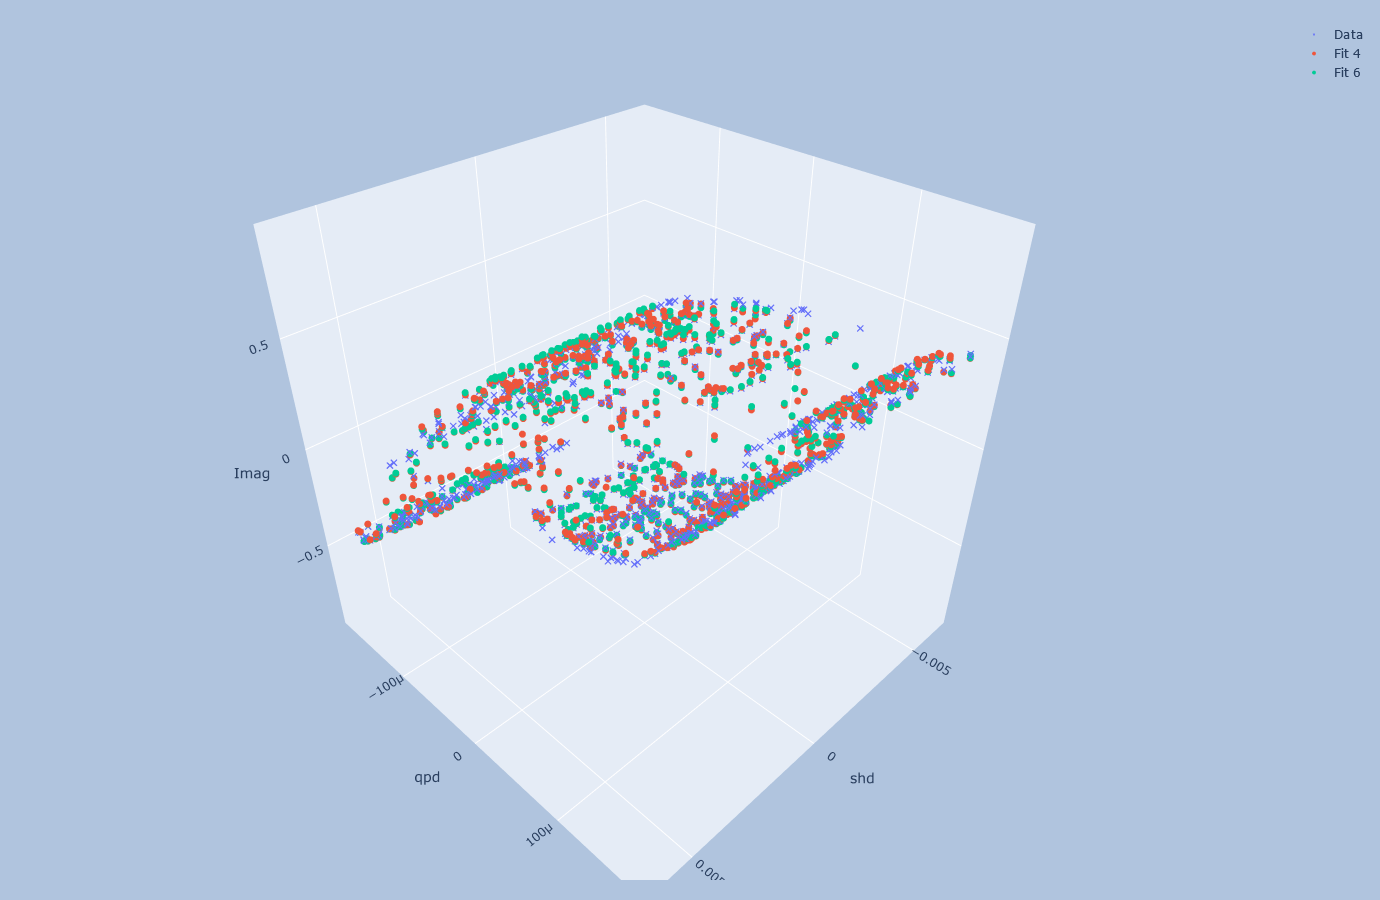

In [68]:
M4__ = STAREG.predict(Xpred=df[inputs].values, model=M4["model"], coef_=M4["coef_"])
M6__ = STAREG.predict(Xpred=df[inputs].values, model=M6["model"], coef_=M6["coef_"])


plot_i = 1
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df["shd"][::plot_i], y=df["qpd"][::plot_i], z=df["Imag"][::plot_i], name="Data", mode="markers", marker=dict(size=2, symbol="x")))
fig.add_trace(go.Scatter3d(x=df["shd"][::plot_i], y=df["qpd"][::plot_i], z=M4__["ypred"][::plot_i], name="Fit 4", mode="markers",marker=dict(size=4, symbol="circle")))
fig.add_trace(go.Scatter3d(x=df["shd"][::plot_i], y=df["qpd"][::plot_i], z=M6__["ypred"][::plot_i], name="Fit 6", mode="markers",marker=dict(size=4, symbol="circle")))

fig.update_layout(
    scene=dict(xaxis_title="shd", yaxis_title="qpd", zaxis_title="Imag"),
    autosize=False,
    width=1400,
    height=900,
    paper_bgcolor="LightSteelBlue",
    margin=dict(l=20, r=20, t=20, b=20),
)